In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,10-05-2019,2,1,5,0,4,1,1,20.739153,24.58915,55.2083,21.042221,1026,5546,6572
495,496,11-05-2019,2,1,5,0,5,1,1,21.866653,26.04165,36.0417,15.874779,1319,5711,7030
496,497,12-05-2019,2,1,5,0,6,0,1,23.130847,27.24085,48.0417,8.249911,2622,4807,7429
497,498,13-05-2019,2,1,5,0,0,0,1,25.112500,29.26190,57.6250,15.082839,2172,3946,6118


In [3]:
df.drop(['instant'], axis=1, inplace=True)


In [4]:
#To check if there are any null objects (if yes, replace them with median values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      499 non-null    object 
 1   season      499 non-null    int64  
 2   yr          499 non-null    int64  
 3   mnth        499 non-null    int64  
 4   holiday     499 non-null    int64  
 5   weekday     499 non-null    int64  
 6   workingday  499 non-null    int64  
 7   weathersit  499 non-null    int64  
 8   temp        499 non-null    float64
 9   atemp       499 non-null    float64
 10  hum         499 non-null    float64
 11  windspeed   499 non-null    float64
 12  casual      499 non-null    int64  
 13  registered  499 non-null    int64  
 14  cnt         499 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 58.6+ KB


<AxesSubplot:ylabel='weekday'>

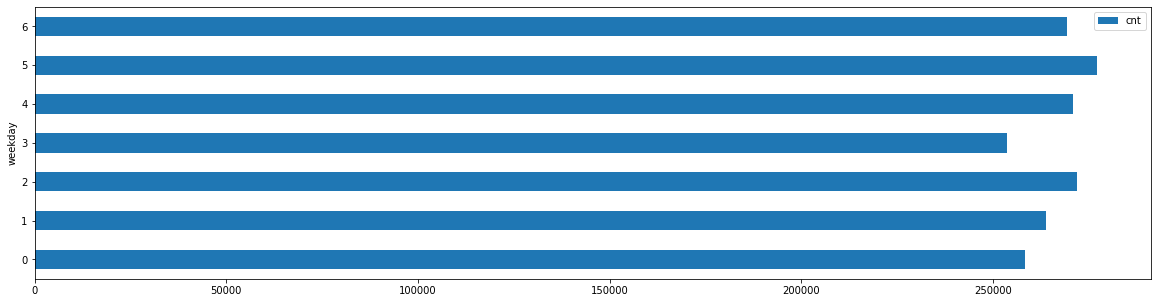

In [5]:
df[['weekday', 'cnt']].groupby(['weekday']).sum().plot(kind='barh', figsize=(20, 5))

<AxesSubplot:ylabel='weathersit'>

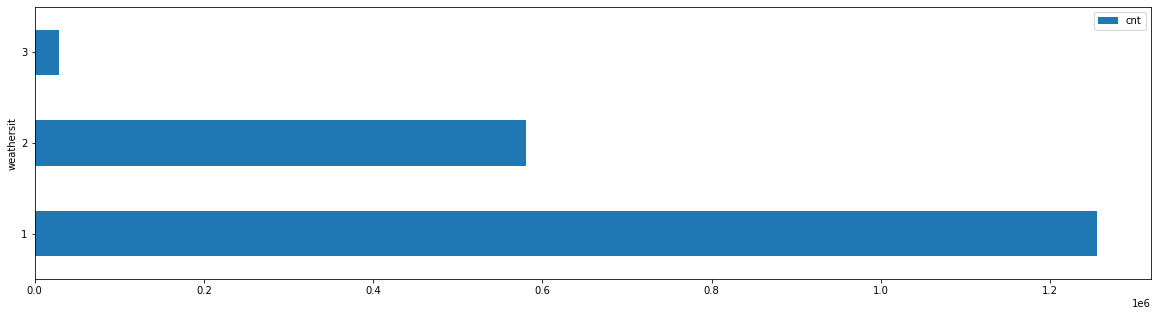

In [6]:
df[['weathersit', 'cnt']].groupby(['weathersit']).sum().plot(kind='barh', figsize=(20, 5))

<AxesSubplot:ylabel='mnth'>

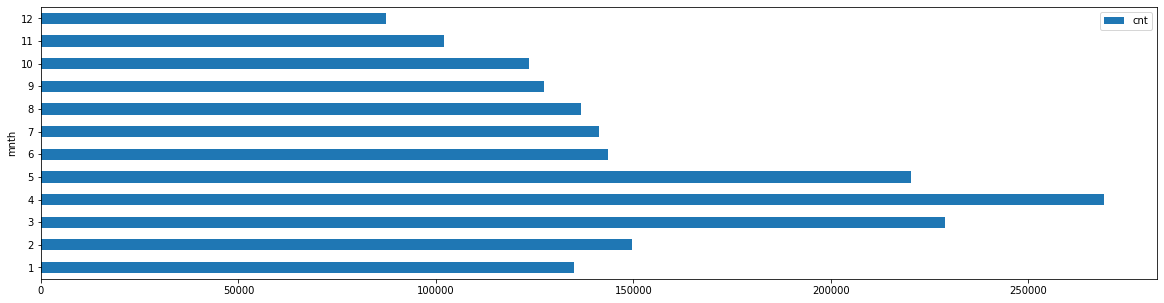

In [8]:
df[['mnth', 'cnt']].groupby(['mnth']).sum().plot(kind='barh', figsize=(20, 5))

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      499 non-null    object 
 1   season      499 non-null    int64  
 2   yr          499 non-null    int64  
 3   mnth        499 non-null    int64  
 4   holiday     499 non-null    int64  
 5   weekday     499 non-null    int64  
 6   workingday  499 non-null    int64  
 7   weathersit  499 non-null    int64  
 8   temp        499 non-null    float64
 9   atemp       499 non-null    float64
 10  hum         499 non-null    float64
 11  windspeed   499 non-null    float64
 12  casual      499 non-null    int64  
 13  registered  499 non-null    int64  
 14  cnt         499 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 58.6+ KB


In [10]:
X = df[['season','yr','mnth','holiday','weekday','weathersit','temp','atemp','hum','windspeed','registered']]
y = df['cnt']

In [11]:
X

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,registered
0,1,0,1,0,6,2,14.110847,18.18125,80.5833,10.749882,654
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,670
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1229
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1454
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1518
...,...,...,...,...,...,...,...,...,...,...,...
494,2,1,5,0,4,1,20.739153,24.58915,55.2083,21.042221,5546
495,2,1,5,0,5,1,21.866653,26.04165,36.0417,15.874779,5711
496,2,1,5,0,6,1,23.130847,27.24085,48.0417,8.249911,4807
497,2,1,5,0,0,1,25.112500,29.26190,57.6250,15.082839,3946


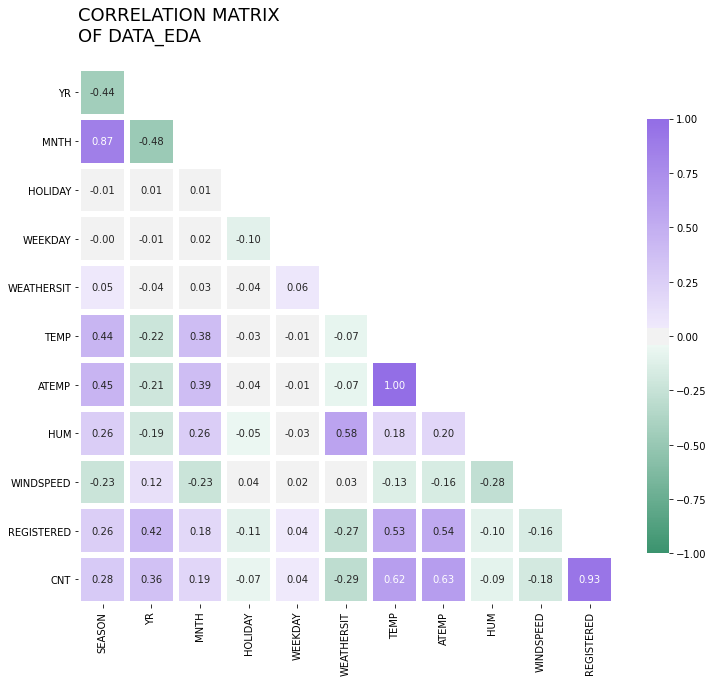

In [13]:
import seaborn as sb
data2 = pd.concat([X,y],axis=1)
data_cor = data2.corr()
fig, ax = plt.subplots(figsize=(12, 10))
upper_tri = np.triu(np.ones_like(data_cor,dtype = np.bool))
upper_tri = upper_tri[1:,:-1]
cor = data_cor.iloc[1:,:-1].copy()
colour_map = sb.diverging_palette(150, 275, s=80, l=55,as_cmap=True)
sb.heatmap(cor, mask=upper_tri, annot=True, fmt=".2f", 
           linewidths=5, cmap=colour_map, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in cor.index]
xticks = [i.upper() for i in cor.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nOF DATA_EDA\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

# Splitting the dataset and evaluation indicator in MAPE

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
import numpy as np
from sklearn.metrics import mean_squared_error

# Linear Regression

In [33]:
reg = LinearRegression().fit(X_train, y_train)

In [34]:
y_lrpredict = reg.predict(X_test)

In [35]:
y_lrpredict

array([5432.30507497, 1931.07493685, 4555.11462026, 4646.67912466,
       5101.56523289, 3622.22064994, 4046.98841602, 1480.62254652,
       3275.75401274, 1337.46683041, 3278.00123207, 4451.11873728,
       3491.84380077, 4957.30458871, 2328.15130444, 1655.12441692,
       4630.58439843, 1386.51585824, 3817.53458815, 5513.06874877,
       4571.72872938, 4724.78714959, 5072.78021565, 2170.9693293 ,
       1699.19568574, 3152.82711322, 4552.80673005, 3995.54838369,
       2319.98334579, 1004.54680331, 6107.68035903, 3149.21069577,
       4519.27163824, 1374.1980996 , 3281.70271081, 2048.3278242 ,
       4754.64393726, 4379.13991326, 6227.16976037, 4191.37536746,
       5268.41725345, 4557.29850685, 1559.23474757, 3410.54358337,
       1077.7523878 , 1130.54527324, 3757.81404134, 4985.67340319,
       1985.80379759, 3131.75485639, 3133.08121822, 5478.49456162,
       4452.23239991, 4047.17171949, 1691.22114879, 2093.85874553,
       3877.54768921, 6355.97859855, 4541.65070842, 3793.12109

In [37]:
print(mean_absolute_percentage_error(y_test,y_lrpredict))

8.953182816978979


# Tree based model

In [38]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [39]:
reg = xgb.XGBRegressor(n_estimators=500)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train)],
        early_stopping_rounds=40,
       verbose=True)

[0]	validation_0-rmse:2876.63037
[1]	validation_0-rmse:2057.95679
[2]	validation_0-rmse:1486.46497
[3]	validation_0-rmse:1081.97498
[4]	validation_0-rmse:798.06720
[5]	validation_0-rmse:593.60242
[6]	validation_0-rmse:450.11182
[7]	validation_0-rmse:349.61145
[8]	validation_0-rmse:273.83975
[9]	validation_0-rmse:221.61264
[10]	validation_0-rmse:181.31259
[11]	validation_0-rmse:156.02133
[12]	validation_0-rmse:136.18417
[13]	validation_0-rmse:120.25091
[14]	validation_0-rmse:110.46078
[15]	validation_0-rmse:102.82660
[16]	validation_0-rmse:94.71747
[17]	validation_0-rmse:87.10750
[18]	validation_0-rmse:80.94102
[19]	validation_0-rmse:78.21358
[20]	validation_0-rmse:75.27052
[21]	validation_0-rmse:71.77913
[22]	validation_0-rmse:68.06467
[23]	validation_0-rmse:64.83978
[24]	validation_0-rmse:61.33713
[25]	validation_0-rmse:58.30721
[26]	validation_0-rmse:55.52390
[27]	validation_0-rmse:53.20634
[28]	validation_0-rmse:50.27921
[29]	validation_0-rmse:46.78789
[30]	validation_0-rmse:44.8505

[257]	validation_0-rmse:0.00997
[258]	validation_0-rmse:0.00980
[259]	validation_0-rmse:0.00964
[260]	validation_0-rmse:0.00919
[261]	validation_0-rmse:0.00885
[262]	validation_0-rmse:0.00866
[263]	validation_0-rmse:0.00832
[264]	validation_0-rmse:0.00791
[265]	validation_0-rmse:0.00761
[266]	validation_0-rmse:0.00747
[267]	validation_0-rmse:0.00709
[268]	validation_0-rmse:0.00667
[269]	validation_0-rmse:0.00640
[270]	validation_0-rmse:0.00627
[271]	validation_0-rmse:0.00604
[272]	validation_0-rmse:0.00597
[273]	validation_0-rmse:0.00581
[274]	validation_0-rmse:0.00553
[275]	validation_0-rmse:0.00530
[276]	validation_0-rmse:0.00520
[277]	validation_0-rmse:0.00513
[278]	validation_0-rmse:0.00501
[279]	validation_0-rmse:0.00491
[280]	validation_0-rmse:0.00462
[281]	validation_0-rmse:0.00448
[282]	validation_0-rmse:0.00429
[283]	validation_0-rmse:0.00413
[284]	validation_0-rmse:0.00397
[285]	validation_0-rmse:0.00386
[286]	validation_0-rmse:0.00374
[287]	validation_0-rmse:0.00362
[288]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

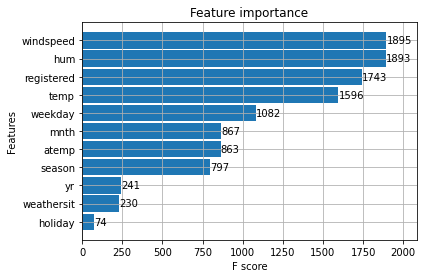

In [28]:
from xgboost import plot_importance, plot_tree
_ = plot_importance(reg, height=0.9)

In [40]:
xg_predict = reg.predict(X_test)

C:\Users\rishi\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [41]:
print(mean_absolute_percentage_error(y_test,))

5.581673871129999
